# 第二章: 二维向量绘图

In [2]:
%load_ext autoreload
%autoreload 2
# 这里导入了相同文件夹下的vector_drawing所有东西，用from ... import * 导入
from vector_drawing import *
from vectors import *
from polar_formatter import *

## 2.1 二维向量绘图

### 2.1.1 如何表示二维向量

本节没有代码

### 2.1.2 用Python绘制二维图形

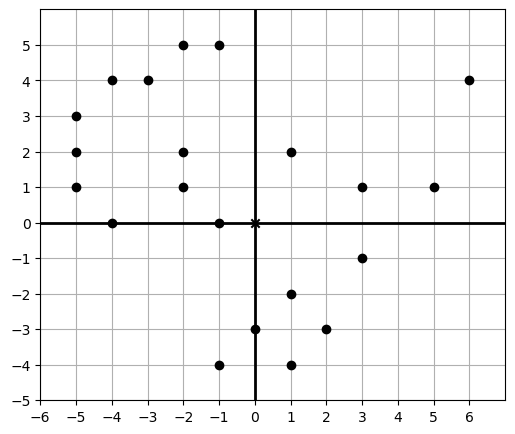

In [5]:
# 书P21
# 使用原组如(6, 4)表示二维点，下面是点的一个列表[(6,4), ..........]
dino_vectors = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2),
                (-5, 1), (-4, 0), (-2, 1), (-1, 0), (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]
# 这里使用的*不是指针，是将列表中的元素一个个取出来作为参数，下面会给出一个示例
draw(
    Points(*dino_vectors)
)


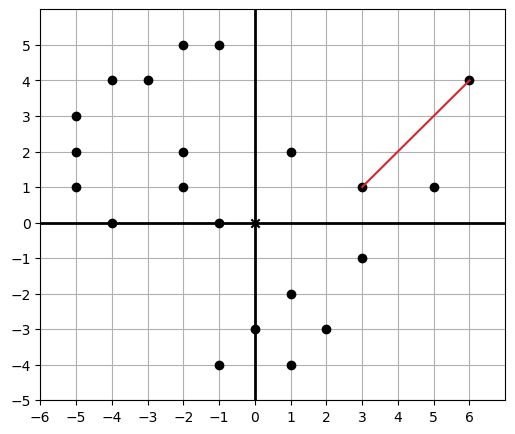

In [9]:
# 书P21
draw(
    Points(*dino_vectors),
    Segment((6,4),(3,1), color=red)
)

### 2.1.3 练习

#### **练习2.1** 恐龙脚趾间上的点的x坐标和y坐标是什么？

解：(-1, -4)

#### **练习2.2** 在平面上画出点(2, -2)和与之对应的箭头

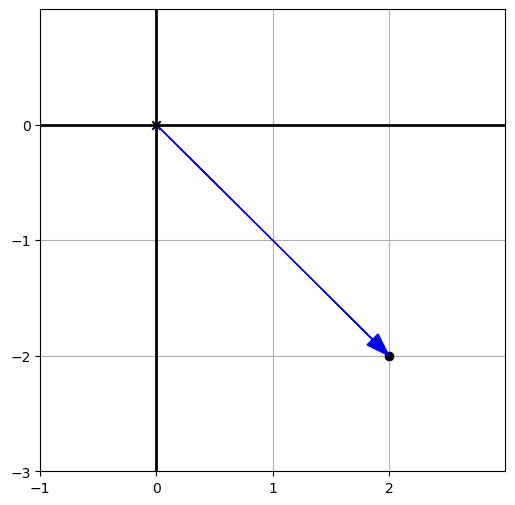

In [6]:
draw(
    Points((2, -2)),
    Arrow((2, -2), color="Blue")
)

#### **练习2.3** 通过观察恐龙各点的位置，推断dino_vectors列表未包含的其余向量。例如，列表已经包含了恐龙尾巴尖上的点(6, 4)，但不包含恐龙鼻子上的点(-5, 3)。完成后，dino_vectors列表中应该有由21个坐标对表示的向量。

In [10]:
# 恐龙轮廓的完整向量列表如下。
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

#### **练习2.4** 构建一个以 `dino_vectors` 为顶点的 `Polygon` 对象，画出将每个点相连的恐龙图像

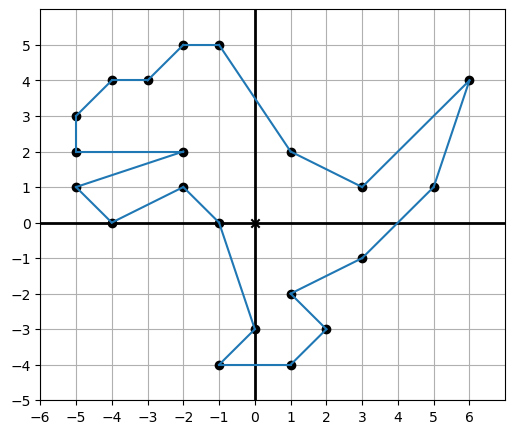

In [8]:
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

#### **练习2.5** 当$x$坐标在-10到10的范围内时，使用 `draw` 函数绘制表示向量`(x, x**2)` 的点。

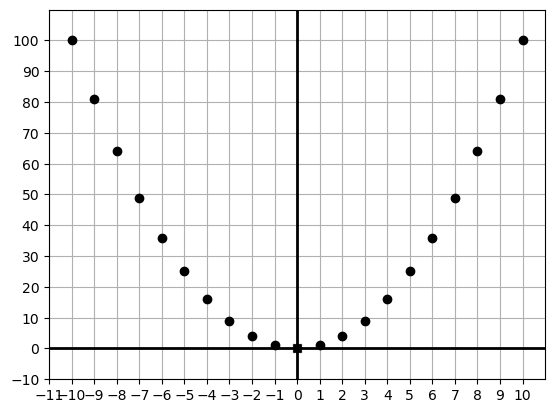

In [13]:
draw(
    Points(*[(x, x**2) for x in range(-10,11)]),
    grid=(1,10), # 每个1个单位水平网格线，每10单位垂直网格线
    nice_aspect_ratio=False # x，y轴比例可以不相同
)

## 2.2 平面向量运算

In [ ]:
# 书P25
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

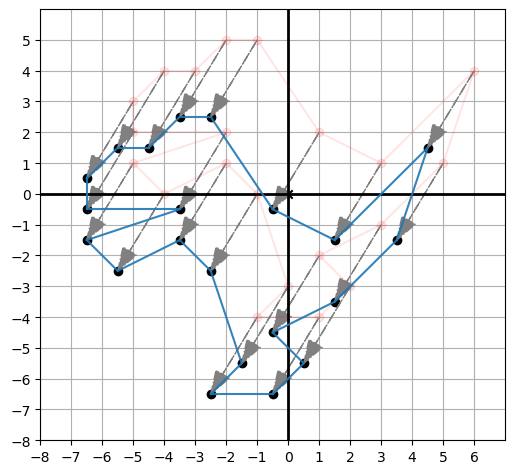

In [38]:
# 书P27
dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]
arrows = [Arrow(tip,tail,color="gray", linestyle="-.") for (tip,tail) in zip(dino_vectors2, dino_vectors)]
draw(
    Points(*dino_vectors, color="red", alpha=0.1),
    Polygon(*dino_vectors, color="red", alpha=0.1),
    Points(*dino_vectors2),
    Polygon(*dino_vectors2, alpha=0.9),
    *arrows
)

### 2.2.1 向量的分量和长度

In [40]:
# 书P29
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2)

### 2.2.2 向量与数相乘

无代码

###  2.2.3 减法、位移和距离

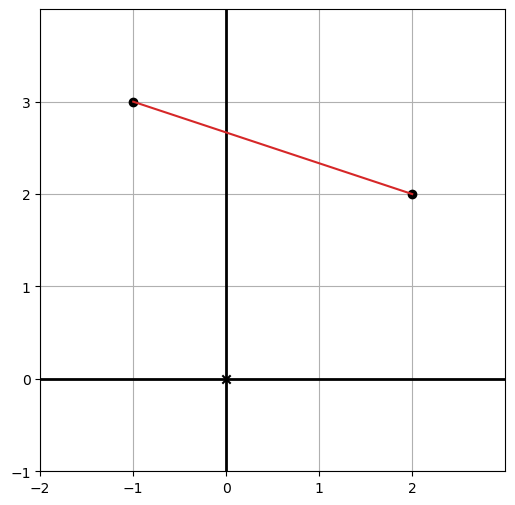

In [44]:
# 书P33，绘制v和w的位移
draw(
    Points((2,2), (-1,3)),
    Segment((2,2), (-1,3), color=red)
)

### 2.2.4 练习

#### **练习2.6** 对于向量$u=(-2, 0)$、向量$v=(1.5, 1.5)$和向量$w=(4, 1)$，$u+v$、$v+w$和$u+w$的结果是什么？$u+v+w$的结果又是什么？

u+v = (-2, 0) + (1.5, 1.5) = (-2+1.5, 0+1.5) = (-0.5, 1.5)


v+w = (1.5, 1.5) + (4, 1) = (1.5+4, 1.5+1) = (5.5, 2.5)


u+w = (-2, 0) + (4, 1) = (-2+4, 0+1) = (2, 1)


u+v+w = (-2, 0) + (1.5, 1.5) + (4, 1) = (-2+1.5+4, 0+1.5+1) = (3.5, 2.5)

#### **练习2.7（小项目）** 通过将所有向量各自的$x$坐标和$y$坐标相加，可以实现任何数量的向量相加。例如，向量和$(1,2) + (2,4) + (3,6) + (4,8)$ 有$x$分量 $1+2+3+4=10$ 与$y$分量 $2 + 4 + 6 + 8 = 20$ ，结果为$(10,20)$。实现新的 $add$ 函数，接受任意多个向量作为参数。

In [46]:
def add(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

#### **练习2.8** 实现函数 translate(translation, vectors)， 接受一个平移向量和一个向量列表，返回一个根据平移向量平移后的向量列表。例如，`translate((1,1), [(0,0), (0,1), (-3,-3)])` 应该返回 `[(1,1),(1,2),(-2,-2)]`.

In [4]:
def translate(translation, vectors):
    return [ add(translation, item) for item in vectors]
translate((1,1), [(0,0), (0,1,), (-3,-3)])

[(1, 1), (1, 2), (-2, -2)]

#### **练习2.9** 向量之和$v+w$与$w+v$结果相同。用坐标形式的向量和的定义来解释其原因。同时，用图像来说明为什么这在几何上是成立的。

解：如果把两个向量$z=(a, b)$和v=(c, d)相加，其中坐标$a, b, c, d$都是实数，那么向量$z+v$的结果是$(a+c, b+d)$，而$v+z$的结果是$(c+a, d+b)$。这两对坐标相同，因为实数相加时的顺序并不重要。对于首尾加法，无论哪种顺序都能得到相同的向量和。为了更形象地解释这一点，图2-27展示了将一对向量首尾相加的示例。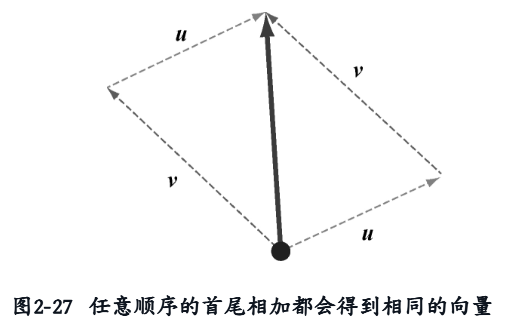不管是$z+v$还是$v+z$（虚线）​，得到的向量都是一样的（实线）​。在几何学中，两组$v$和$z$形成了一个平行四边形，而向量和就是对角线。

#### **练习2.10** 在如图2-28所示的三个箭头向量（标为$u$、$v$和$w$）中，哪一对的和对应的箭头最长？哪一对的和对应的箭头最短？

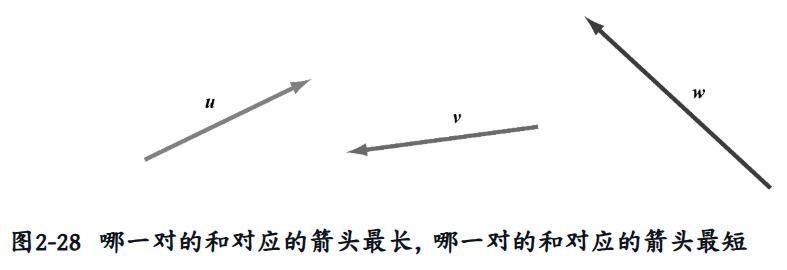

解：可以通过首尾加法测量每一对向量和，如图2-29所示。检查结果，可以看到$v$+$u$最短（$u$和$v$的方向几乎相反，接近于互相抵消）​，最长的是$v$+$w$。

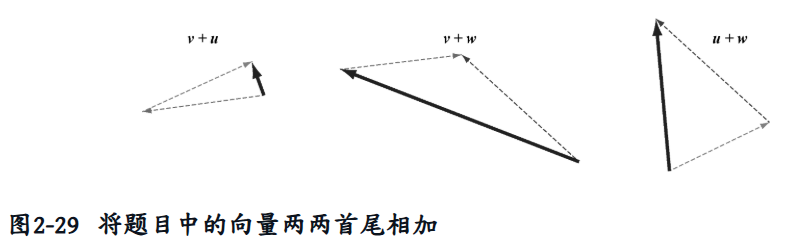

#### **练习 2.11** 实现一个处理向量加法的Python函数，显示100个相互不重叠的恐龙图像。这体现了计算机图形学的威力。想象一下，手绘2100个坐标对是一件多么乏味的事情！

解：可以在垂直和水平方向上平移恐龙，设置合适的间距，使它们不重叠。这里省去网格线、坐标轴、原点和坐标点，让图像更清晰一些。代码如下所示。

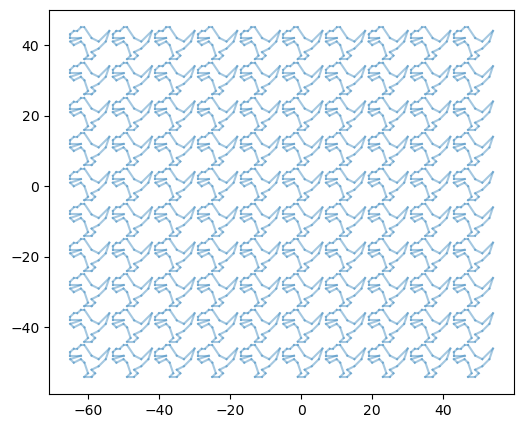

In [10]:
def hundred_dinos():
    translations = [(12*x,10*y) for x in range(-5,5) for y in range(-5,5)]
    dinos = [Polygon(*translate(t, dino_vectors),color=blue) for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)
hundred_dinos()

#### **练习2.12** 对于$(3, -2) + (1, 1) + (-2, -2)$，是$x$分量还是$y$分量更长？

解：向量和$(3, -2) + (1, 1) + (-2, -2)$的结果是$(2, -3)$，其中$x$分量为$(2, 0)$，$y$分量为$(0,-3)$。$x$分量的长度为2个单位（向右）​，而$y$分量的长度为3个单位（向下，因为它是负数）​。所以$y$分量更长。

#### **练习2.13** 向量$(-6, -6)$和$(5, -12)$的分量和长度分别是多少？

解：$(-6, -6)$的分量是$(-6, 0)$和$(0, -6)$，长度都是6。$(-6, -6)$的长度是$62 + 62$的平方根，大约是8.485。$(5, -12)$的分量是$(5, 0)$和$(0, -12)$，长度分别为5和12。$(5, -12)$的长度是$52 + 122 = 25 +144 = 169$的平方根，即13。

#### **练习2.14** 假设有一个长为6的向量$v$和它的$x$分量(1, 0)。$v$的坐标可能是什么？

解：因为$(1, 0)$的长度为1，其$x$分量的长度为1，所以$y$分量的长度$b$必须满足$1^2+b^2=6^2$，即$1+b^=36$。那么$b^2=35$，$y$分量的长度约为5.916。但无法确定$y$分量的方向。向量$v$可能是$(1, 5.916)$或($1, -5.916)$。

#### **练习2.15** dino_vectors列表中哪个向量的长度最长？用我们实现的length函数快速计算出答案。

In [5]:
# 这里max的第一个参数是可迭代的列表dino_vectors，
# 然后可选参数key=length中的length是之前定义的函数，这里用于比较dino_vectors的元素之间的大小
max(dino_vectors, key=length)

(6, 4)

In [8]:
# 这里介绍一下max的使用方法
# 文档： https://docs.python.org/zh-cn/3/library/functions.html?highlight=max#max

# 1.如果只提供了一个位置参数，它必须是非空 iterable，返回可迭代对象中最大的元素；
max1 = max([12, 32, 42, 12])
# 2.如果提供了两个及以上的位置参数，则返回最大的位置参数。
max2 = max(12, 90, 23, 12)

# 3.如果指定了key 实参指定排序函数用的参数
def distance_to618(number):
    """返回到6.18的距离大小"""
    return abs(number-6.18)
max3 = max(4, 5, 6, 9.26,  key=distance_to618)

print("max1:", max1, "max2:", max2, "max3:", max3)

max1: 42 max2: 90 max3: 9.26


#### **练习2.16** 假设向量 $\vec{w}$ 的坐标是 $(\sqrt{2} ,\sqrt{3})$. 那么 $\pi \cdot \vec{w}$ 的坐标近似值是多少？ 画出原向量和新向量。

π·sqrt(2) (1.4142135623730951, 1.7320508075688772)


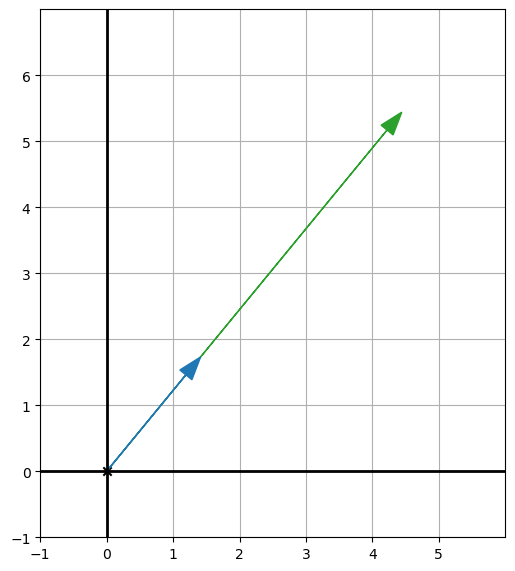

In [15]:
from math import sqrt, pi

w = (sqrt(2),sqrt(3))
w_scaled = (pi * sqrt(2), pi * sqrt(3))
print("π·sqrt(2)", w)
draw(
    Arrow(w_scaled, color=green),
    Arrow(w, color=blue)
)

#### **练习2.17** 写一个函数 `scale(s, v)`, 将输入向量 `v` 和输入标量 `s` 相乘。

In [17]:
def scale(scalar,v):
    return (scalar * v[0], scalar * v[1])

#### **练习2.18（小项目）** 用代数方法证明，将坐标按照一个系数缩放，会将向量的长度以同等系数缩放。假设一个长度为$c$的向量坐标为$(a, b)$。证明，对于任意非负实数$s$，$(s·a, s·b)$的长度是$s·c$。（$s$不能是负值，因为向量的长度不可能为负。）

解：用符号$|(a, b)|$来表示向量$(a, b)$的长度。从题目可得到如下公式。
$$
c = \sqrt{a^2 + b^2}=|(a, b)|
$$
从而算出$(sa, sb)$的长度。


$$
\begin{align*}
|(sa, sb)| &= \sqrt{(sa)^2 + (sb)^2} \\
           &= \sqrt{s^2a^2 + s^2b^2} \\
           &= \sqrt{s^2·(a^2 + b^2)} \\
           &= |s|·\sqrt{a^2 + b^2} \\
           &= |s|·c
\end{align*}
$$


如果$s$不是负值，那么$s=|s|$，缩放以后向量的长度就是$s·c$。

#### **练习2.19（小项目）** 假定 $\vec{u} = (-1,1)$ 和 $\vec{v} = (1,1)$, $r$ 和 $s$ 是实数，并且假设 $-1 < r < 1$ 且 $-3 < s < 3$.向量$r \cdot \vec{u} + s \cdot \vec{v}$在平面上可能的终点是什么?

注意:向量和数字的操作顺序是一样的:我们假设先进行标量乘法，然后进行向量加法(除非括号中另有说明)。

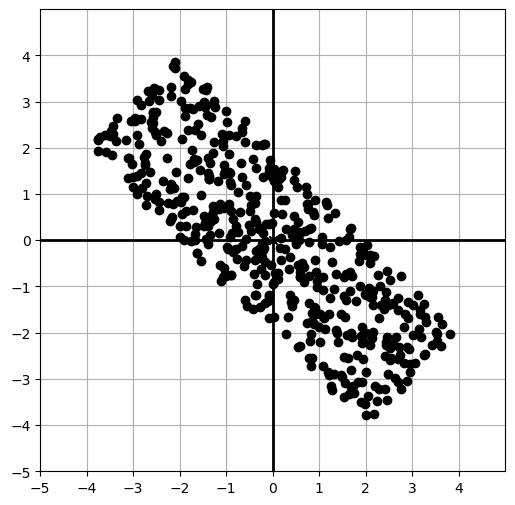

In [18]:
from random import uniform
# uniform函数在[a, b)或[a, b]范围内获取一个随机数。

u = (-1, 1)
v = (1, 1)

def random_r():
    return uniform(-3, 3)

def random_s():
    return uniform(-1, 1)


possibilities = [add(scale(random_r(), u), scale(random_s(), v)) for i in range(0, 500)]
draw(
    Points(*possibilities)
)

#### **练习2.20** 用代数法证明为什么一个向量和其负向量具有相同的长度。

提示：将向量坐标及其负向量坐标代入勾股定理的公式。

解：$(a, b)$的负向量的坐标为$(-a, -b)$，但并不影响长度（二者长度相等）。

$$
    \sqrt{(-a)^2 + (-b)^2} = \sqrt{a^2 + b^2}
$$

#### **练习2.21** 在如图2-33所示的七个用箭头表示的向量中，哪两个是一对相反的向量？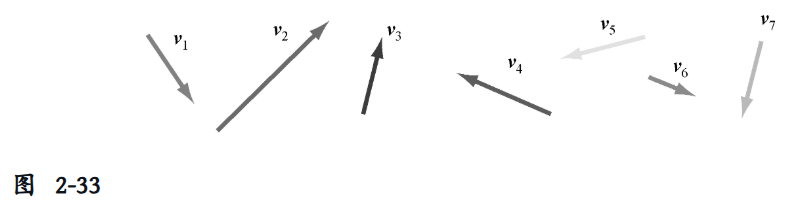

解：向量$v_3$和$v_7$是一对相反的向量。

#### **练习2.22** 假定$u$是任意二维向量。$u+(-u)$的坐标是什么？

解：二维向量$u$的坐标为$(a, b)$，其负向量的坐标为$(-a, -b)$，因此可以得到如下等式。
$$
    u+(-u) = (a, b) + (-a, -b) = (a-a, b-b) = (0, 0)
$$
答案是$(0, 0)$。在几何意义上，这意味着如果你沿着一个向量走到头、再折返回来，最终还是会回到原点$(0, 0)$。

#### **练习 2.23** 对于向量$u=(-2, 0)$、$v=(1.5, 1.5)$和$w=(4,1)$，$v-w$、$u-v$和$w-v$的结果分别是什么？

解：
$$
\begin{align*}
    &v-w = (1.5, 1.5) - (4, 1) = (1.5-4,  1.5-1) = (-2.5, 0.5) \\
    &u-v = (-2, 0) - (1.5, 1.5) = (-2-1.5, 0-1.5) = (-3.5, -1.5 \\
    &w-v = (4, 1) - (1.5, 1.5) = (4-1.5, 1-1.5)  = (2.5, -0.5)
\end{align*}
$$

#### **练习2.24** 实现python函数 `subtract(v1,v2)`, 返回 `v1` - `v2`。 该函数接受两个二维向量作为输入，返回一个二维向量作为输出。

In [21]:
def subtract(v1,v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

#### **练习2.25** 实现Python函数 `distance(v1, v2)`, 返回两个输入向量之间的距离。（注意，上一个练习中的 `subtract` 函数已经实现了两个向量之间的位移。

实现另一个函数 `perimeter(vectors)`，它接受一个向量列表作为参数，并返回每个向量到下一个向量的距离之和（包含末位向量与首位向量之间的距离），以此来获取向量几何 `dino_vectors` 所定义的恐龙周长。

In [27]:
def distance(v1,v2):
    return length(subtract(v1,v2))

def perimeter(vectors):
    distances = [distance(vectors[i], vectors[(i+1)%len(vectors)]) for i in range(0,len(vectors))]
    return sum(distances)

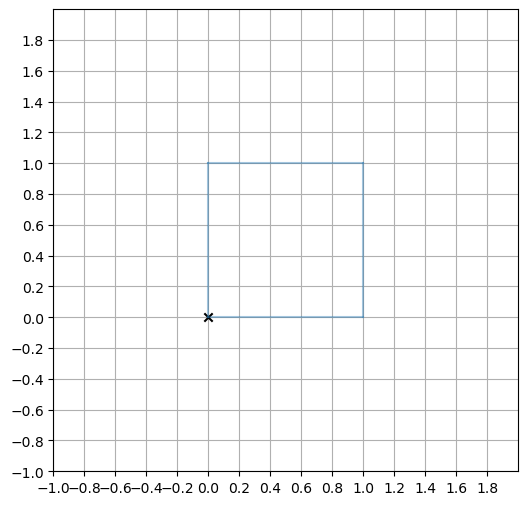

In [28]:
# 用正方形进行测试
square = [(1,0),(1,1),(0,1),(0,0)]
draw(Polygon(*square), grid=(0.2,0.2), axes=None)

In [29]:
# should be 1+1+1+1=4
perimeter(square)

4.0

In [30]:
perimeter(dino_vectors)

44.77115093694564

#### **练习2.26** 令 $\vec{u}$ 为向量 $(1,2)$。假定有另一个正整数坐标为 $(n, m)（n > m）$的向量 $\vec{v}$，且它与 $\vec{u}$ 的距离是13，那么从 $\vec{u}$ 到 $\vec{v}$ 的位移是所少？

**解决方案:** 我们只需要搜索可能的整数对(n,m)，其中n在1的前后13个单位内，m在-1的前后13个单位内。

In [31]:
for m in range(1, 13):
    for n in range(m+1, 15):
        if distance((n,m), (1,-1)) == 13:
            print((n,m))

(13, 4)


只找到了一个结果：(13, 4)。它相对于(1, -1)右移了12个单位、上移了5个单位，所以位移是(12, 5)。

## 2.3 平面上的角度和三角学

### 2.3.1 从角度到分量

本节没有代码

### 2.3.2 Python中的三角学和弧度

In [1]:
from math import tan
tan(45) 
# 45弧度，而不是45度
# tangent of 45 radians, not degrees

1.6197751905438615

In [2]:
from math import tan, pi
tan(pi/4)
# 现在是 pi/4 弧度 = 45度
# now this is the tangent of pi/4 radians = 45 degrees

0.9999999999999999

In [3]:
# P47
from math import sin, cos
def to_cartesian(polar_vector):
    """接受一对极坐标，返回对应的笛卡尔坐标"""
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))

In [4]:
# P47 验证沿着37度的方向移动5个单位可以接近点（4，3）
# Verify that 5 units @ 37 degrees takes us to (4,3)
angle = 37*pi/180
to_cartesian((5,angle))

(3.993177550236464, 3.0090751157602416)

### 2.3.3 从分量到角度

In [5]:
from math import asin
print(sin(1), asin(0.8414709848078965))

0.8414709848078965 1.0


P48页，第一行，书中$sin(θ)=3\sqrt13, cos(θ)=2\sqrt13$，这两个三角函数值是错误的，应该是$sin(θ)=3/\sqrt13, cos(θ)=2/\sqrt13$

In [6]:
# 找出一个角x, 使 sin x = 3/sqrt(13)
# trying to find an angle x such that sin x = 3/sqrt(13)
from math import sqrt
asin(3/sqrt(13))

0.9827937232473292

P48页，第六行，书中“到目前为止，没有什么问题。但角$3\sqrt13$的正弦呢？”，这里的$3\sqrt13$，应该是$3/\sqrt13$


P48页，倒数第三行，书中“所以这个角的正弦值也是$3\sqrt13$。”，这里的$3\sqrt13$，应该是$3/\sqrt13$

In [7]:
from math import acos
acos(-2/sqrt(13))

2.1587989303424644

P49页，第二行后半部分，书中“所以它所在的角度与θ的余弦同为$-2\sqrt13$。”，这里的$-2\sqrt13$，应该是$-2/\sqrt13$

In [8]:
cos(2.1587989303424644)

-0.5547001962252293

In [9]:
-2/sqrt(13)

-0.5547001962252291

In [10]:
sin(2.1587989303424644)

0.8320502943378435

In [11]:
3/sqrt(13)

0.8320502943378437

In [1]:
# math.atan2(y, x) 以弧度为单位返回 atan(y / x)，在 -pi 和 pi 之间
# math.atan2的具体使用看这里：
# https://docs.python.org/zh-cn/3/library/math.html?highlight=math%20atan2#math.atan2
from math import atan2
atan2(3,-2)

2.158798930342464

In [13]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

In [16]:
to_polar((1,0))

(1.0, 0.0)

In [17]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

### 2.3.4 练习

#### **练习2.27** 确认笛卡尔坐标(-1.34,2.68)对应的向量的长度约为3

In [4]:
length((-1.34,2.68))

2.9963310898497184

#### **练习2.28** 图2-45中是一条从$x$正半轴开始按逆时针方向旋转22°角的直线。根据图2-45，$tan(22\degree)$的近似值是多少？
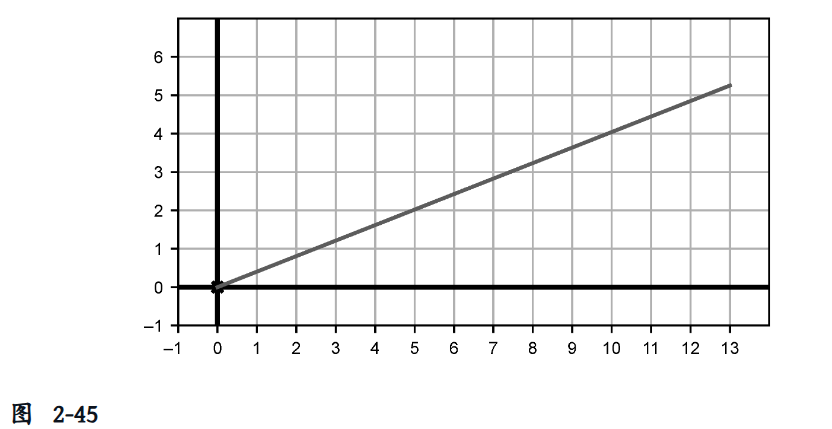

解：直线经过点(10, 4)附近，所以4/10 = 0.4是$tan(22\degree)$的合理近似值，如图2-46所示。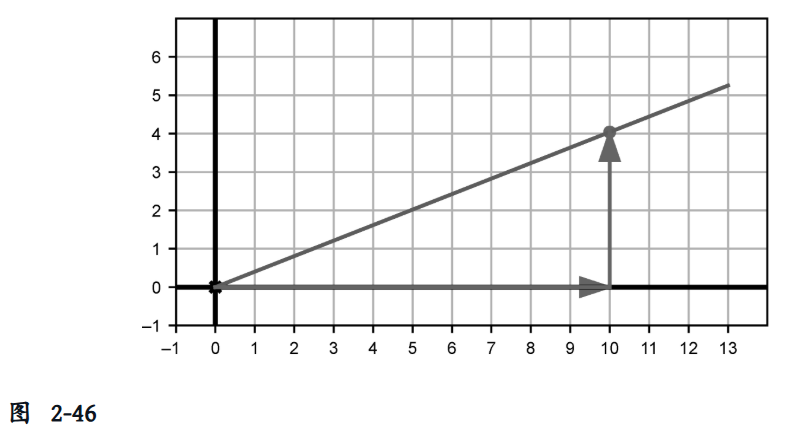

#### **练习2.29** 转换问题的角度，假设我们知道了一个向量的长度和方向，想找到它的分量该如何做呢？一个长度为15的向量指向37°角，其$x$分量和$y$分量是多少？

解：37°的正弦值大约是3/5，表示沿这个角度每移动5个单位，就会垂直向上移动3个单位。所以，长度为15的向量的垂直分量为3/5·15，即9。

37°的余弦约等于4/5，表示在这个方向上每移动5个单位，就会水平向右移动4个单位，所以水平分量是4/5·15，即12。综上所述，极坐标(15, 37°)与笛卡儿坐标(12, 9)大致对应。

In [7]:
from math import pi, sin, cos
y = sin(pi * 37/180) * 15
x = cos(pi * 37/180) * 15
(x, y)

(11.979532650709393, 9.027225347280725)

#### **练习2.30** 假设从原点出发，沿着从$x$轴正半轴逆时针旋转125°的方向移动8.5个单位，那么最终坐标是什么？已知$sin(125\degree)=0.819$、$cos(125\degree)=-0.574$，请画图来表示走过的角度和路径。

$$
x = r * cos(125\degree) = 8.5 * -0.574 = -4.879\\
$$
$$
y = r * cos(125\degree) = 8.5 * 0.819 = 6.962
$$
图2-47显示了最终坐标为 (-4.879, 6.962)。


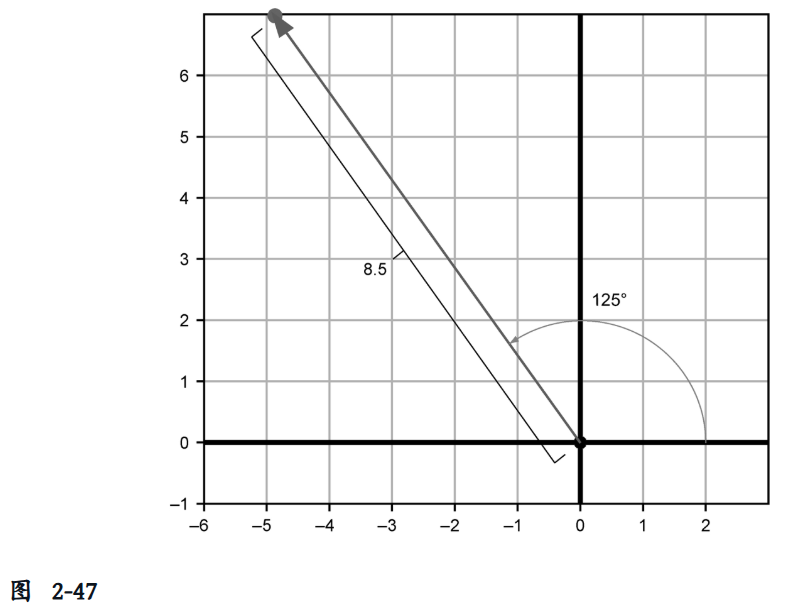

#### **练习2.31** 0°、90°和180°的正弦和余弦各是多少？换句话说，在这些方向上，每单位距离经过多少个垂直和水平单位？

解：对于0°，没有垂直距离，所以$sin(0\degree)=0$；而每移动1个单位的距离就经过$x$轴正半轴方向上的1个单位，所以$cos(0\degree)=1$。

对于90°（逆时针转1/4圈）​，每移动1个单位的距离就经过$y$轴正半轴方向上的1个单位，所以$sin(90\degree)$=1，而$cos(90\degree)=0$。

最后，对于180°，每移动1个单位的距离都经过$x$轴负半轴方向上的1个单位，所以$sin(180\degree)=0$，而$cos(180\degree)=-1$。

#### **练习2.32** 图2-48对于一个直角三角形给出了一些精确的测量数据。首先，确认这些长度在直角三角形中的有效性，因为它们必须满足勾股定理。然后，用图中的数据计算$sin(30\degree)$、$cos(30\degree)$和$tan(30\degree)$的值，精确到小数点后三位。


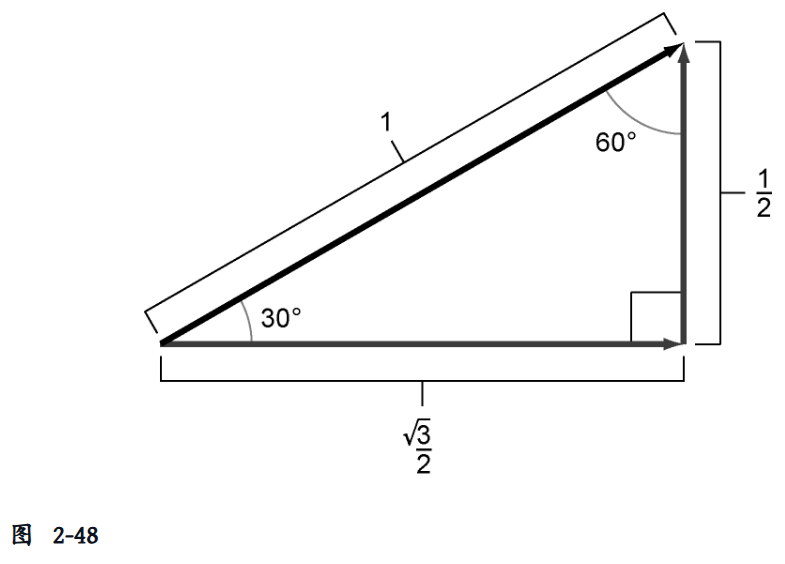

$sin(30\degree) = \frac{1/2}{1} = \frac{1}{2}$


$cos(30\degree) = \frac{\sqrt3/2}{1} = \frac{\sqrt3}{2}$
书中给的答案是$cos(30\degree) = \frac{\sqrt3/2}{2} = \frac{\sqrt3}{4}$是错误的

$tan(30\degree) = \frac{1/2}{\sqrt3/2}= \frac{1}{\sqrt3}$

#### **练习2.33** 从另一个角度观察上一个练习中的三角形，用它计算$sin(60\degree)$、$cos(60\degree)$和$tan(60\degree)$的值，精确到小数点后三位。

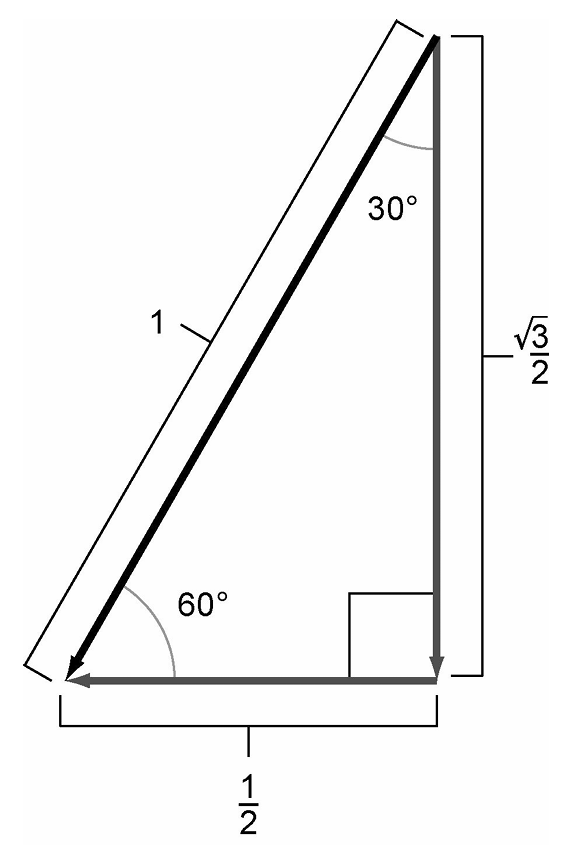

$sin(60\degree) = \frac{\sqrt3/2}{1} = \frac{\sqrt3}{2}$


$cos(60\degree) = \frac{1/2}{1} = \frac{1}{2}$


$tan(60\degree) = \frac{\sqrt3/2}{1/2}= \frac{1}{\sqrt3}$

#### **练习2.34** 已知50°的余弦值是0.643。的值是多少，$tan(50degree)$的值又是多少？通过画图来计算。

解：已知50°的余弦值是0.643，可以画出如图2-50所示的三角形。

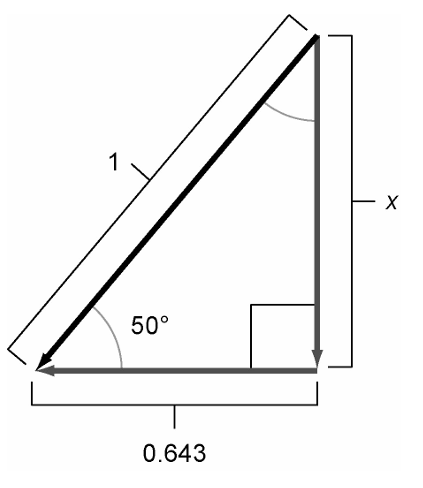

也就是说，已知两个边长的比值：0.643/1 = 0.643。要找到未知边长，可以使用勾股定理。
$$
\sqrt{0.643^2+x^2}=1
x = 0.766
$$
在已知边长的情况下，$sin(50degree)=0.766/1=0.766$，$tan(50degree)=0.766/0.643$。

#### **练习2.35** 116.57°对应的弧度是多少？用Python计算这个角的正切值，并确认它约等于-2。

In [3]:
from math import pi, tan
arc = pi * (116.57 / 180)
tan_value = tan(arc)
display(arc, tan_value)

2.0345303090497895

-1.9995682083189976

#### **练习2.36** $cos(10\pi/6)$和$\sin(10\pi/6)$的值为正还是为负？使用Python计算它们的值并确认。

解:一个完整的圆的弧度是2π，所以π/6是一个圆的1/12。可以想象成把一张比萨切成12块，从正半轴开始逆时针数，角10π/6表示只差两块就转完了。这说明它指向右下方，所以余弦应该是正值，而正弦应该是负值，因为这个方向的水平分量和垂直分量分别是正的和负的。

In [5]:
from math import sin,cos
display(sin(10*pi/6), cos(10*pi/6))

-0.8660254037844386

0.5000000000000001

#### **练习2.37** 用下面的列表推导式创建1000个极坐标对应的点。[(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]在Python代码中，将这些点转换为笛卡儿坐标，并用线段依次将其连接起来，从而画出一幅画。

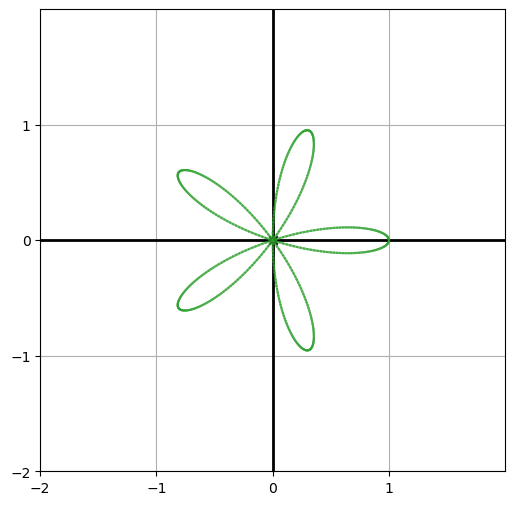

In [11]:
from math import sin, cos
polar_code = [(cos(5*x*pi/500.0), 2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(p) for p in polar_code]
draw(Polygon(*vectors, color=green))

#### **练习2.38** 通过“猜测检查法”（guess-and-check）找出(-2, 3)对应的弧度（见图2-52）。

提示：显然答案在π/2和π之间。在这个区间内，正切的绝对值总是随着弧度的增大而减小。

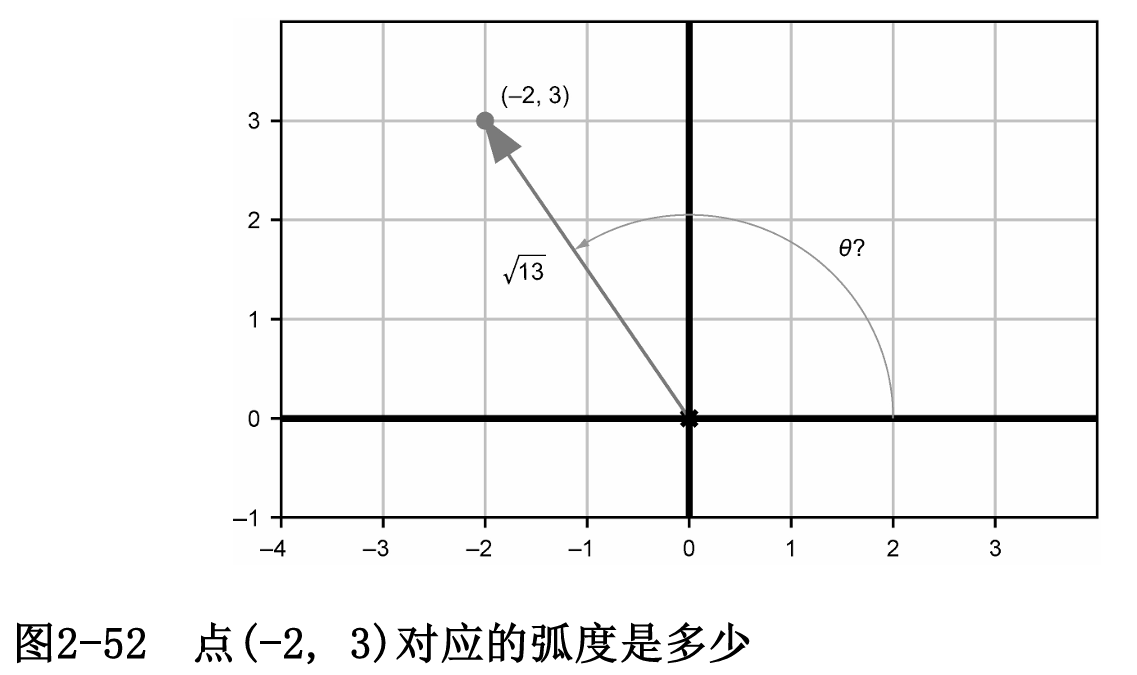

In [46]:
from math import pi, tan
print("pi/2", pi/2, 3/-2)
print("猜测01：1.8  弧度", tan(1.8))
print("猜测02：2.0  弧度", tan(2.0))
print("猜测03：2.5  弧度", tan(2.5))
print("猜测04：2.2  弧度", tan(2.2))
print("猜测05：2.3  弧度", tan(2.3))
print("猜测06：2.05  弧度", tan(2.05))
print("猜测06：2.10  弧度", tan(2.10))
print("猜测06：2.15  弧度", tan(2.15))
print("猜测06：2.14  弧度", tan(2.14))
print("猜测06：2.16  弧度", tan(2.16))
print("猜测06：2.155  弧度", tan(2.155))
print("猜测06：2.1555  弧度", tan(2.1555))
print("猜测06：2.1556  弧度", tan(2.1556))
print("猜测06：2.156  弧度", tan(2.156))

pi/2 1.5707963267948966 -1.5
猜测01：1.8  弧度 -4.286261674628062
猜测02：2.0  弧度 -2.185039863261519
猜测03：2.5  弧度 -0.7470222972386602
猜测04：2.2  弧度 -1.3738230567687948
猜测05：2.3  弧度 -1.1192136417341325
猜测06：2.05  弧度 -1.9245606717322779
猜测06：2.10  弧度 -1.7098465429045075
猜测06：2.15  弧度 -1.5289797578045667
猜测06：2.14  弧度 -1.5628769600778223
猜测06：2.16  弧度 -1.496103541616277
猜测06：2.155  弧度 -1.5124173422757465
猜测06：2.1555  弧度 -1.510774881073669
猜测06：2.1556  弧度 -1.5104466865812456
猜测06：2.156  弧度 -1.5091348993879299


####  **练习2.39** 在平面上找到另一个与有相同正切值（即-3/2）的点。使用Python的反正切函数math.atan来求这个点的弧度值。

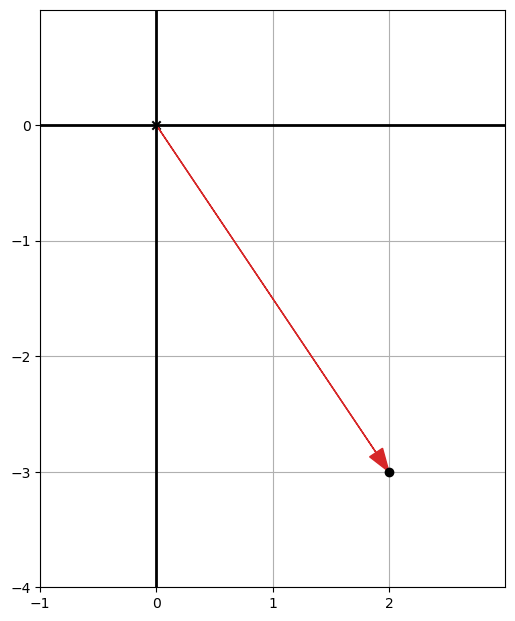

In [47]:
from math import atan
atan(-3/2)
draw(Arrow((2,-3)), Points((2,-3)))

#### **练习2.40** 不使用Python，算出笛卡儿坐标(1, 1)和(1, -1)对应的极坐标。找到答案之后，使用to_polar来检查一下。

$(1, 1)$-->$(\sqrt2, \frac{π}{4})$


$(1, -1)$-->$(\sqrt2, \frac{7π}{4})$ or >$(\sqrt2, -\frac{π}{4})$

这里生成了一个文件polar_formatter.py用于在jupyter中显示成分数和π的格式的极坐标

In [62]:
polar_display((1,1))

(1.414, π/4)

In [63]:
polar_display((1,-1))

(1.414, 7π/4)

#### **练习2.41（小项目）** 如图2-53所示，恐龙嘴巴的夹角是多少？脚趾的夹角是多少？尾巴的夹角是多少？

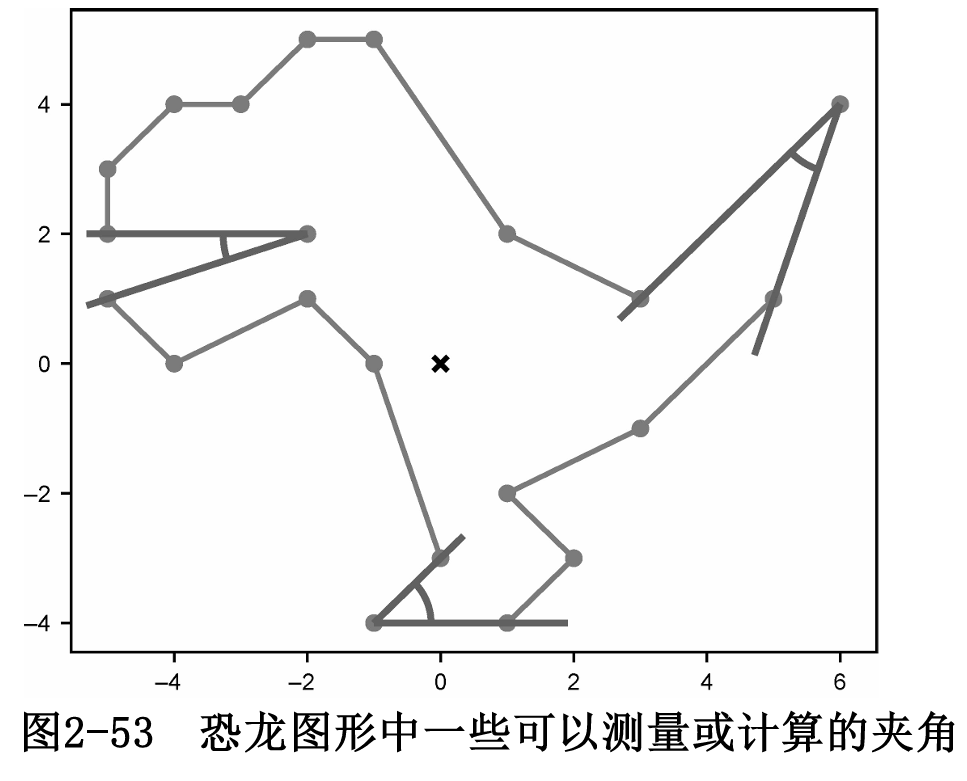

计算夹角需要使用知道这些向量的坐标：

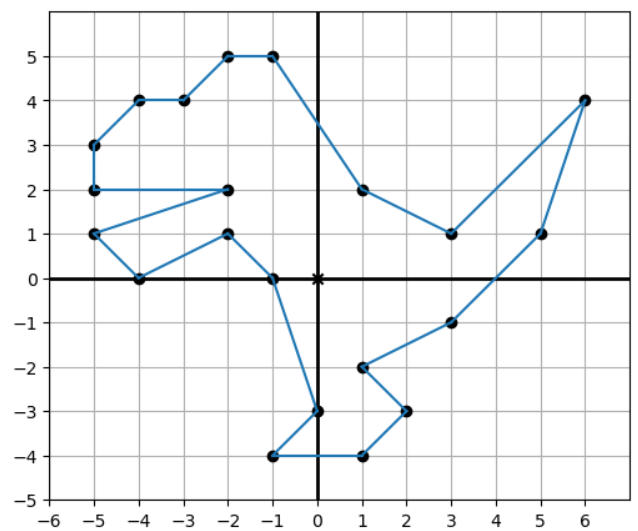

恐龙嘴夹角，以弧度为单位


恐龙嘴夹角，以弧度为单位
这个向量等价于(3,1)
polar_display((3,1))

In [3]:
polar_display((3,1))

(3.162, 0.102π)

In [4]:
polar_display((1,1))

(1.414, π/4)

In [7]:
polar_display((3,3)), polar_display((1, 3))

((4.243, π/4), (3.162, 0.398π))

In [8]:
(0.398 - 0.24) * pi

0.4963716392671874

## 向量集合的变换

P58页，将恐龙逆时针旋转π/4

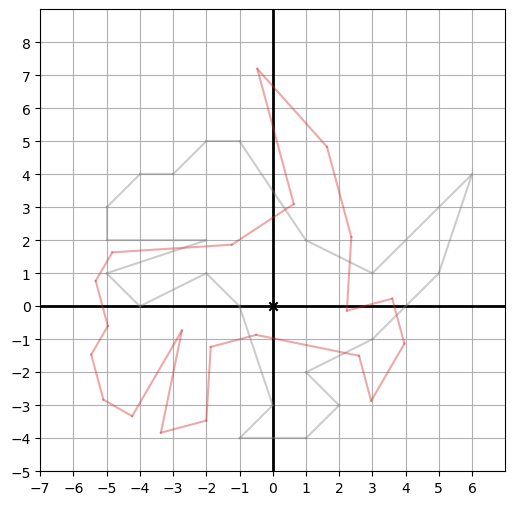

In [11]:
rotation_angle = pi/3

dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]

draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*dino_rotated, color=red)
)

### 2.4.1 组合向量变换

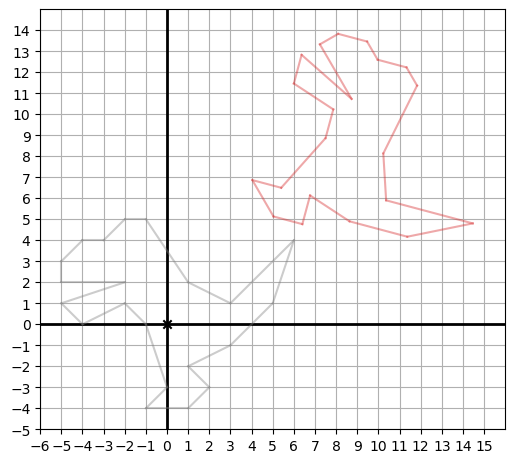

In [12]:
from math import pi
new_dino = translate((8,8), rotate(5*pi/3, dino_vectors))
draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*new_dino, color=red)
)

### 2.4.2 练习

#### **练习2.42** 实现 `rotate(angle, vectors)` 函数，接受笛卡尔坐标向量数组，并将这些向量旋转指定的角度（根据角度的正负来确定是逆时针还是顺时针）。

In [13]:
def rotate(angle, vectors):
    """将向量组vectors中的所有元素都逆时针旋转角度angle"""
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((l, a+angle)) for l,a in polars]

#### **P60 练习2.43** 实现函数 `regular_polygon(n)`, 返回一个规则 $n$ 边形(即所有角和边长都相等)的各顶点的笛卡尔坐标。例如，Polygon(7)返回如图2-57所定义七边形的顶点向量。

提示：在图2-57中，基于原点对向量(1, 0)进行6次均匀的旋转，从而得到了各个顶点。

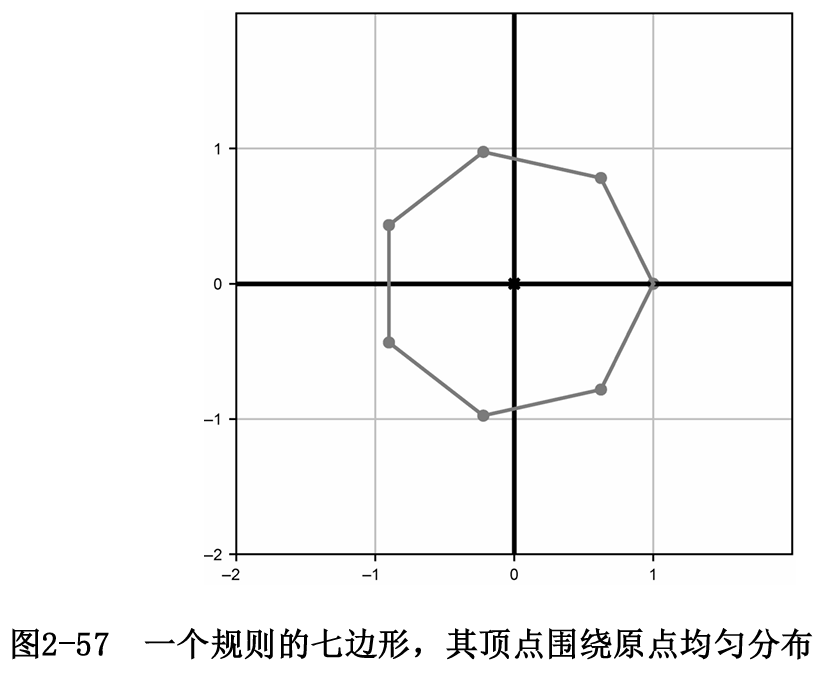

In [52]:
from math import pi
def regular_polygon_my(n):
    return [rotate(i*2*pi/n, [(1,0)])[0] for i in range(1, n+1)]

def regular_polygon_book(n):
    """返回一个规则 n 边形的各顶点的笛卡尔坐标。"""
    return [to_cartesian((1, 2*pi*k/n)) for k in range(0,n)]

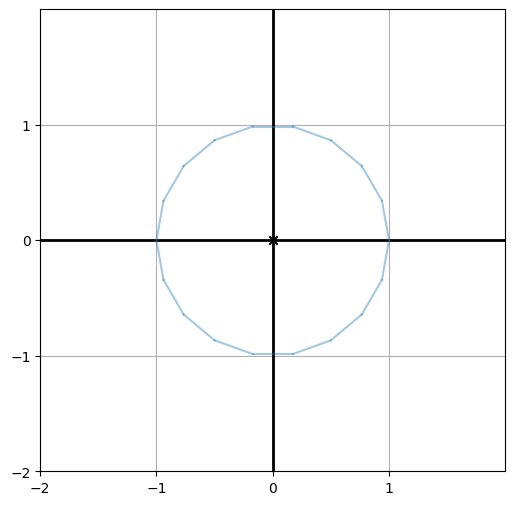

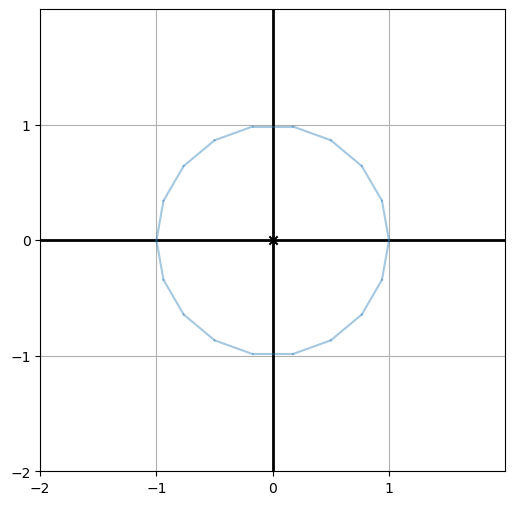

In [54]:
draw(Polygon(*regular_polygon_my(18)))
draw(Polygon(*regular_polygon_book(18)))

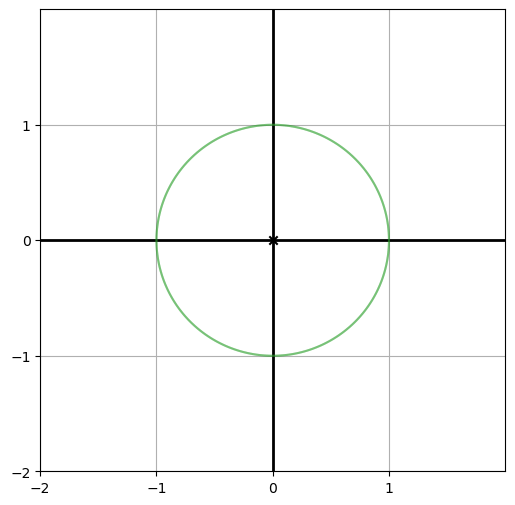

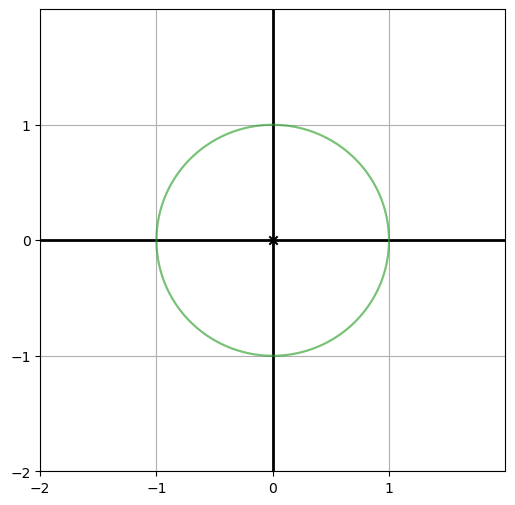

In [55]:
draw(Polygon(*regular_polygon_my(360), color=green))
draw(Polygon(*regular_polygon_book(360), color=green))

#### **练习2.44** 先将恐龙按向量(8, 8)平移，再将其旋转5π/3（见图2-58），结果是什么？和先旋转再平移的结果一样吗？

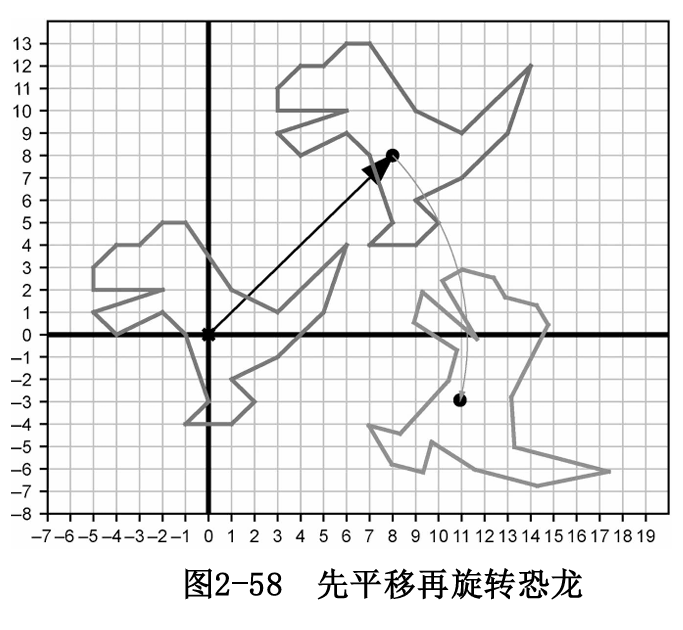

先平移再旋转：

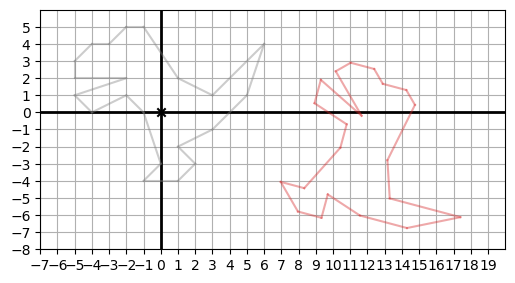

In [57]:
from math import pi
# new_dino = translate((8,8), rotate(5*pi/3, dino_vectors))
new_dino = rotate(5*pi/3, translate((8, 8), dino_vectors))
draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*new_dino, color=red)
)

先旋转再平移

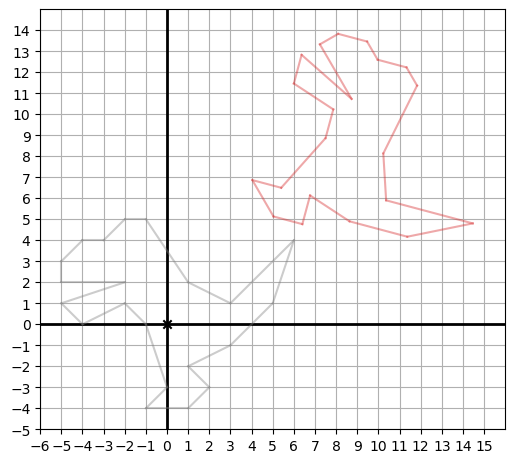

In [56]:
from math import pi
new_dino = translate((8,8), rotate(5*pi/3, dino_vectors))
draw(
    Polygon(*dino_vectors, color=gray),
    Polygon(*new_dino, color=red)
)

结果并不一样。通常，以不同的顺序应用旋转和平移，会产生不同的结果。

## 2.5 用Matplotlib绘图

In [2]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection